## Problem 3

### Part 2 Following the tutorial

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from sklearn.metrics import mean_squared_error
from math import sqrt

%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [38]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],test.loc[:,'MSSubClass':'SaleCondition']))

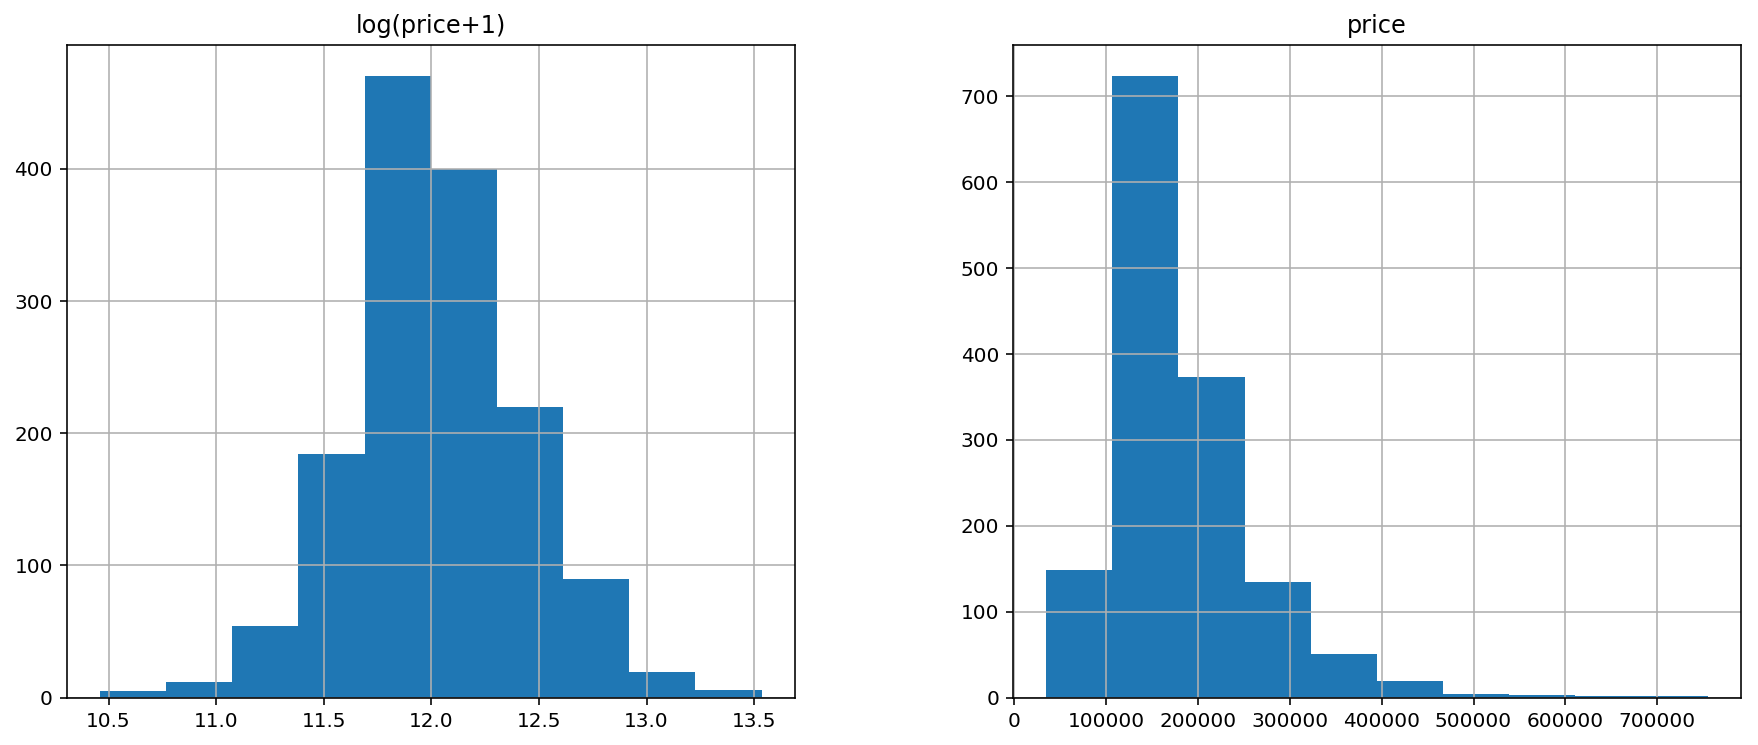

In [39]:
matplotlib.rcParams['figure.figsize'] = (15.0, 6.0)
prices = pd.DataFrame({'price':train["SalePrice"],"log(price+1)":np.log1p(train["SalePrice"])})
_ = prices.hist()

In [40]:
train['SalePrice'] = np.log1p(train["SalePrice"])
numeric_feats = all_data.dtypes[(all_data.dtypes != 'object')].index
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna()))
skewed_feats = skewed_feats[skewed_feats>0.75]
skewed_feats = skewed_feats.index
all_data[skewed_feats] = np.log1p(all_data[skewed_feats])
all_data = pd.get_dummies(all_data)
all_data = all_data.fillna(all_data.mean())
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y_train = train.SalePrice

In [41]:
model = Ridge(alpha = 0.1)
model.fit(X_train,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [42]:
arr = np.expm1(model.predict(X_test))
pd.DataFrame(arr).to_csv("kaggle_results.csv")

In [43]:
rmse_train = sqrt(mean_squared_error(model.predict(X_train), y_train))
print("The training RMSE is: {}".format(rmse_train))

The training RMSE is: 0.09211955585640522


### Part 3 Trying a different model

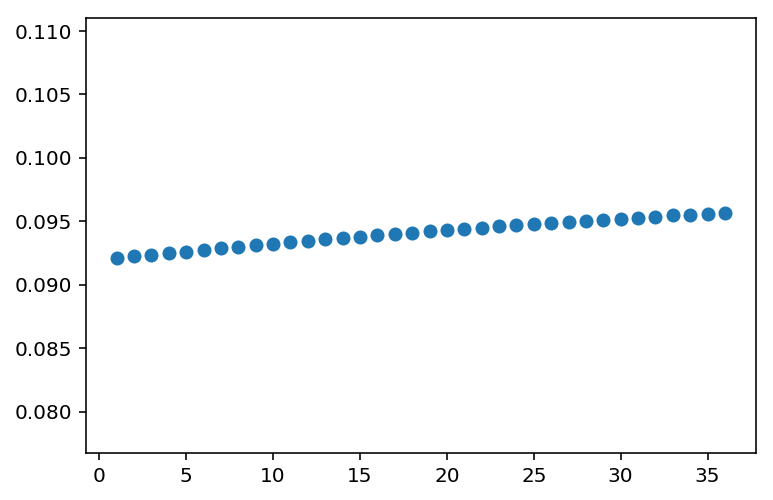

In [69]:
# Naive model- find best training error

X_train = np.array(X_train)
y_train = np.array(y_train)
alphas = np.arange(0.1, 1, 0.025)
rmses = []

for alpha in alphas:
    model = Ridge(alpha)
    model.fit(X_train, y_train)
    rmse_train = sqrt(mean_squared_error(model.predict(X_train), y_train))
    rmses.append(rmse_train)
    
x = np.arange(1,len(rmses) + 1, 1)
plt.scatter(x, rmses)